Instalamos las dependencias requeridas y copiamos el repositorio


In [2]:
# Instalar dependencias de SAMURAI
!pip install matplotlib==3.7 tikzplotlib jpeg4py opencv-python lmdb pandas scipy loguru

# Instalar PyTorch y TorchVision (versiones requeridas)
!pip install torch==2.3.1 torchvision==0.18.1

In [3]:
# Clonar el repositorio SAMURAI
!git clone https://github.com/yangchris11/samurai
%cd samurai

Cloning into 'samurai'...
remote: Enumerating objects: 985, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (34/34), done.
Receiving objects: 100% (985/985), 376.21 MiB | 618.00 KiB/s, done.
remote: Total 985 (delta 44), reused 22 (delta 22), pack-reused 929 (from 2)
Resolving deltas: 100% (221/221), done.
/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai


In [3]:
%cd ./samurai/sam2

/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/sam2


In [4]:
%pip install -e .

Obtaining file:///Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/sam2
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-6.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.1 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached PyYAML-6.0.2-cp311-cp311-macosx_11_0_arm64.whl (172 kB)
  Building editable for SAM-2 (pyproject.toml) ... done
  Created wheel for SAM-2: filename=SAM_2-1.0-0.editable-py3-none-any.whl size=13477 sha256=867337c008e0e4c6914496a183c322271ce04468c6c19a9370fe807abd879f8c
  Stored in directory: /private/var/folders/cp/wr66qlws0zd28j5dnx0fxhz00000gn/T/pip-ephem-wheel-cache-b2ogyriq/wheels/00/02/ac/8af9f2dffdb39133ac5c70cc6be

In [6]:
%cd ./checkpoints

/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/sam2/checkpoints


In [7]:
!bash download_ckpts.sh

--2025-01-17 16:02:29--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_tiny.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 2600:9000:248a:9800:13:6e38:acc0:93a1, 2600:9000:248a:a200:13:6e38:acc0:93a1, 2600:9000:248a:e800:13:6e38:acc0:93a1, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|2600:9000:248a:9800:13:6e38:acc0:93a1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156008466 (149M) [application/vnd.snesdev-page-table]
Saving to: ‘sam2.1_hiera_tiny.pt’

sam2.1_hiera_tiny.p 100%[===================>] 148.78M  10.4MB/s    in 18s     

2025-01-17 16:02:47 (8.32 MB/s) - ‘sam2.1_hiera_tiny.pt’ saved [156008466/156008466]

--2025-01-17 16:02:47--  https://dl.fbaipublicfiles.com/segment_anything_2/092824/sam2.1_hiera_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 2600:9000:248a:3a00:13:6e38:acc0:93a1, 2600:9000:248a:a200:13:6e38:acc0:93a1, 2600:9000:248a:7400:13:6e38:acc0:93a1, ...

In [9]:
%pwd

'/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/sam2/checkpoints'

In [10]:
!ls /Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/sam2/checkpoints


download_ckpts.sh         sam2.1_hiera_large.pt     sam2.1_hiera_tiny.pt
sam2.1_hiera_base_plus.pt sam2.1_hiera_small.pt


Subimos el video de prueba (ruta del video de prueba)

In [2]:
# !cp /content/video.mp4 /content/samurai/data/video.mp4
!cp "/Users/stanleysalvatierra/Downloads/test_video.mp4" "/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/data/video.mp4"

Aquí debería integrarse la interfaz que permite al usuario seleccionar el área de interés.

In [15]:
!pip install -U numpy


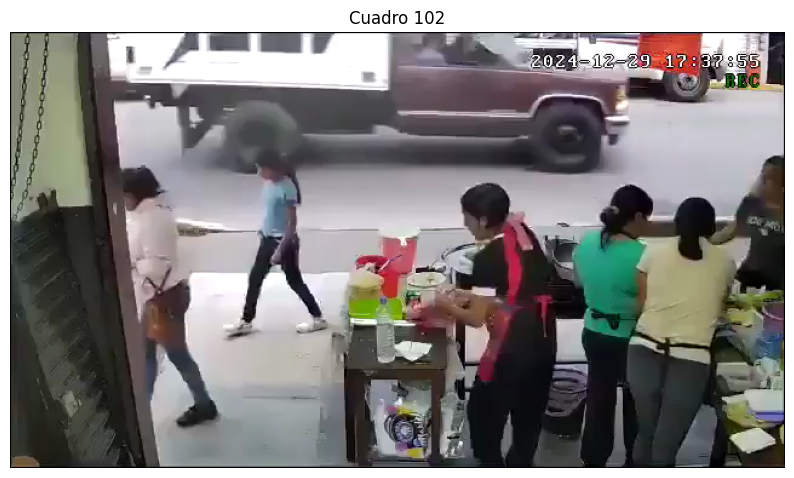

In [3]:
import cv2
import matplotlib.pyplot as plt

# Cargar el video
video_path = "/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/data/video.mp4"

cap = cv2.VideoCapture(video_path)

# Número del cuadro que deseas visualizar
frame_number = 102
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Leer el cuadro deseado
ret, frame = cap.read()
cap.release()

# Verificar si se pudo cargar el cuadro
if ret:
    # Convertir a RGB para mostrarlo con matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Mostrar el cuadro
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title(f"Cuadro {frame_number}")
    plt.axis("off")
    plt.show()
else:
    print(f"No se pudo cargar el cuadro {frame_number}. Verifica el número de cuadro.")


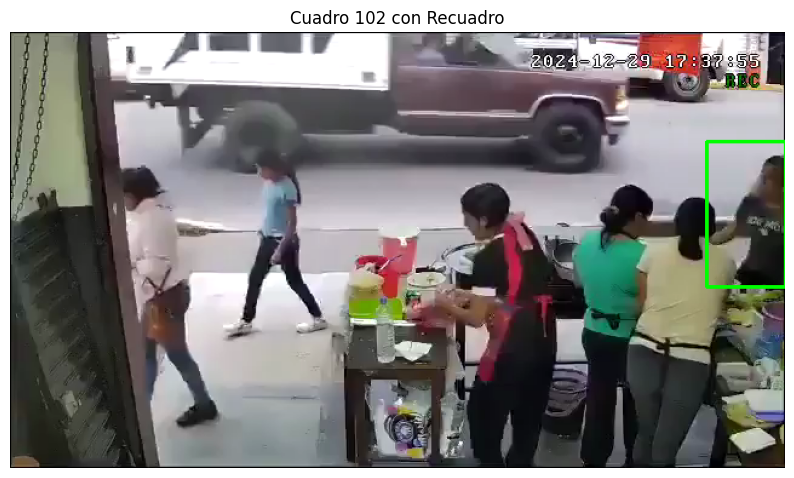

In [4]:
x, y, w, h = 575, 90, 65, 120  # Ajusta estas coordenadas después de ver el cuadro
cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Dibujar el recuadro

# Mostrar el cuadro con el recuadro
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title(f"Cuadro {frame_number} con Recuadro")
plt.axis("off")
plt.show()


Se guardan las coordenadas en el archivo bbox.txt

In [5]:
!echo "575,90,65,120" > ./samurai/data/bbox.txt


In [ ]:
!ls /content/samurai/sam2/checkpoints/sam2.1_hiera_base_plus.pt


/content/samurai/sam2/checkpoints/sam2.1_hiera_base_plus.pt


In [ ]:
!pip install decord

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 94.1 MB/s eta 0:00:00


Se ejecuta el modelo


In [7]:
!python ./samurai/scripts/demo.py --video_path ./samurai/data/video.mp4 --txt_path ./samurai/data/bbox.txt --model_path ./checkpoints/sam2.1_hiera_base_plus.pt


SAMURAI mode: True
Traceback (most recent call last):
  File "/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/./samurai/scripts/demo.py", line 122, in <module>
    main(args)
  File "/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/./samurai/scripts/demo.py", line 44, in main
    predictor = build_sam2_video_predictor(model_cfg, args.model_path, device="cuda:0")
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/stanleysalvatierra/Desktop/2024/CV_MX/samurai/samurai/sam2/sam2/build_sam.py", line 131, in build_sam2_video_predictor
    model = model.to(device)
            ^^^^^^^^^^^^^^^^
  File "/Users/stanleysalvatierra/anaconda3/envs/sam_p11/lib/python3.11/site-packages/torch/nn/modules/module.py", line 1173, in to
    return self._apply(convert)
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/stanleysalvatierra/anaconda3/envs/sam_p11/lib/python3.11/site-packages/torch/nn/modules/module.py", line 779, in _apply
    module._app